Age & grades completed & degree

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
# create new dataframe
age = list(range(5,30))
grade = list(range(0, 21))
grade.extend([20, 20, 20, 20])
len(grade) == len(age)

df = pd.DataFrame({'age': age, 'grade': grade})

As an example, let's build a linear regression to explore what coefficients mean. 

Step 1: `LinearRegression()` 

Give the algorithm my requirements. 


In [ ]:
lm = LinearRegression(fit_intercept=False)

Step 2. `my_linear_model.fit(X_train, y_train)`

The algorithm will then identify the parameters or rules that are specific to my training data with respect to my requirements. It optimizes a function in order to identify what the weights of each independent variables, or feature, should be. These weights are the coefficients for each X and the intercept (if fit_intercept = True)

In [ ]:
lm.fit(df[['age']], df[['grade']])

What is returned are the parameters that will be used when running the model on X values to predict y values. 

In [ ]:
print("predicted_grade = ", lm.intercept_, " + ", lm.coef_[0][0], "* age")

In [ ]:
predicted_grade = lm.predict(df[['age']])

In [ ]:
plt.scatter(df.age, df.grade, label='actual grade')
plt.scatter(df.age, predicted_grade, label='predicted grade')
plt.legend()
plt.xlabel('age')
plt.ylabel('grade')
plt.title('Can we use age to predict grade?')

Let's create a categorical target variable and use logistic regression. 
Let's predict if the people in our study have completed High School. 

In [ ]:
# create a class target variable:  completed_HS = target = y

df['completed_hs'] = df.grade > 12

In [ ]:
# establish baseline

df.completed_hs.value_counts(normalize=True)

In [ ]:
# create model object with hyperparameters: LogisticRegression 


help(LogisticRegression)

In [ ]:
logit = LogisticRegression(C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight={False: 1, True: 99}, 
                  random_state=123, solver='liblinear')



In [ ]:
logit = logit.fit(df[['age']], df['completed_hs'])

In [ ]:
y_pred = logit.predict(df[['age']])
y_pred_proba = logit.predict_proba(df[['age']])



In [ ]:
logit.coef_

In [ ]:
logit.intercept_

In [ ]:
logit.score(df[['age']], df.completed_hs)

In [ ]:
confusion_matrix(df.completed_hs, y_pred)

In [ ]:
print(classification_report(df.completed_hs, y_pred))

## Logistic Regression Model

Are there certain parties that are more/less likely to leave a poor tip? 
If so, should we try to win them over with our best service or not even try? 
We want to predict tips that are lower than 15% of the total bill. In doing so, we hope to see any attributes that are more likely to lead to lower tips. 

We were asked today to have an answer to this yesterday, so we will use rapid iteration to get a model that is "better than baseline" out the door!

### Acquire

In [3]:
# acquire (ok, kinda cheating there)
tips = sns.load_dataset('tips')

### Summarize

- head(), tail()
- info()
- describe()
- shape
- value_counts()
- isnull()
- unique()

In [4]:
tips.shape

(244, 7)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

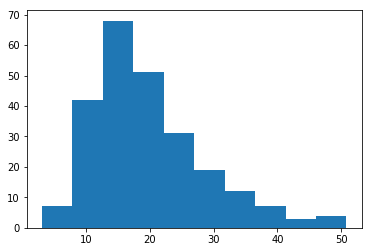

In [7]:
plt.hist(tips.total_bill)

(array([  4.,   0., 156.,   0.,  38.,   0.,  37.,   0.,   5.,   4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

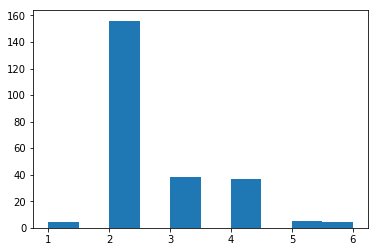

In [8]:
plt.hist(tips['size'])

In [9]:
print(tips.sex.value_counts())
print(tips.day.value_counts())
print(tips.time.value_counts())
print(tips.smoker.unique())

Male      157
Female     87
Name: sex, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
[No, Yes]
Categories (2, object): [No, Yes]


### Prepare

- get_dummies()  

- remove_duplicates

- create new target variable: low_tip

- other new features/variables? 

In [10]:
tips = tips.drop_duplicates()

In [11]:
tips_dummies = pd.get_dummies(tips[['sex', 'day', 'time', 'smoker']], drop_first=True)

In [12]:
tips = pd.concat([tips, tips_dummies], axis=1)

In [13]:
# create target variable: low_tip, defined as tip < 15% of total bill. 
tips['low_tip_target'] = tips.tip/tips.total_bill < .15

In [14]:
# tips.columns
cols_to_drop = ['tip', 'sex', 'smoker', 'day', 'time']
tips.drop(columns=cols_to_drop, inplace = True)

In [15]:
tips.head()

,total_bill,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No,low_tip_target
0,16.99,2,1,0,0,1,1,1,True
1,10.34,3,0,0,0,1,1,1,False
2,21.01,3,0,0,0,1,1,1,False
3,23.68,2,0,0,0,1,1,1,True
4,24.59,4,1,0,0,1,1,1,True


### Split

train, validate, test

In [17]:
train_validate, test = train_test_split(tips, test_size=.2, random_state=123, 
                                        stratify=tips.low_tip_target)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, 
                                   stratify=train_validate.low_tip_target)

print(train.size, validate.size, test.size)

1215 531 441


### Set baseline

In [18]:
train.low_tip_target.value_counts(normalize=True)

False    0.555556
True     0.444444
Name: low_tip_target, dtype: float64

If I were to predict that no one gives low tips, then I would be correct about 55% of the time. So, my baseline is 55% accuracy. 

### Model #1

models vary in the following way:

1. different hyperparameters (class_weight, C value, solver)
2. different features (dropping party size feature, changing a feature)
3. different algorithms (logistic regression, decision tree)

Model 1: default options

In [ ]:
help(LogisticRegression)

Create the model object: giving the algorithm our requirements, our specific instructions. 

In [19]:
logit = LogisticRegression()

Fit the algorithm to our training data. What is returned are the coefficients, or the weights for each feature. 

First, split each sample (train, validate, test) into an X dataframe and a y Series. 

In [20]:
X_train = train.drop(columns=['low_tip_target'])
y_train = train.low_tip_target

X_validate = validate.drop(columns=['low_tip_target'])
y_validate = validate.low_tip_target

X_test = test.drop(columns=['low_tip_target'])
y_test = test.low_tip_target

Now fit to X_train, y_train. 

In [21]:
logit = logit.fit(X_train, y_train)

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print(logit.coef_)

print(logit.intercept_)

[[ 0.09707133 -0.246357   -0.25187821 -0.24045169 -0.11083115 -0.32760799
  -0.3659257  -0.16550546]]
[-0.88840318]


In [23]:
X_train.columns

Index(['total_bill', 'size', 'sex_Female', 'day_Fri', 'day_Sat', 'day_Sun',
       'time_Dinner', 'smoker_No'],
      dtype='object')

Predict values on X_train. 

In [24]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [25]:
y_pred_proba

array([[0.68743352, 0.31256648],
       [0.63276455, 0.36723545],
       [0.69282576, 0.30717424],
       [0.15281713, 0.84718287],
       [0.47027427, 0.52972573],
       [0.53085895, 0.46914105],
       [0.73326143, 0.26673857],
       [0.70565267, 0.29434733],
       [0.80133264, 0.19866736],
       [0.42800687, 0.57199313],
       [0.21241013, 0.78758987],
       [0.49885568, 0.50114432],
       [0.34060228, 0.65939772],
       [0.19479536, 0.80520464],
       [0.46614861, 0.53385139],
       [0.37799968, 0.62200032],
       [0.49063468, 0.50936532],
       [0.20932849, 0.79067151],
       [0.59888785, 0.40111215],
       [0.64268813, 0.35731187],
       [0.82712489, 0.17287511],
       [0.62652062, 0.37347938],
       [0.6046651 , 0.3953349 ],
       [0.64757717, 0.35242283],
       [0.61986835, 0.38013165],
       [0.6929123 , 0.3070877 ],
       [0.25165976, 0.74834024],
       [0.67382486, 0.32617514],
       [0.69233137, 0.30766863],
       [0.65357144, 0.34642856],
       [0.

In [26]:
# accuracy
logit.score(X_train, y_train)

0.6888888888888889

In [27]:
# confusion matrix

print(confusion_matrix(y_train, y_pred))

[[60 15]
 [27 33]]


In [28]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.69      0.80      0.74        75
        True       0.69      0.55      0.61        60

   micro avg       0.69      0.69      0.69       135
   macro avg       0.69      0.68      0.68       135
weighted avg       0.69      0.69      0.68       135



In [29]:
# harmonic mean reciprocal of the average of the reciprocals 


With an accuracy of 68%, our model is better than our baseline. So we should continue to try a couple other models, and then quickly decide on the best. 

### Model #2

Change C to be very low

In [30]:
logit2 = LogisticRegression(C=.00001)

logit2.fit(X_train, y_train)

logit2.coef_

/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 4.95009600e-04, -1.09417370e-04, -6.11594911e-05,
        -5.21367403e-06, -2.11281485e-05, -5.11450672e-05,
        -7.24831132e-05, -6.70154139e-05]])

In [31]:
y_pred = logit2.predict(X_train)
y_pred_proba = logit2.predict_proba(X_train)

In [32]:
# evaluate

logit2.score(X_train, y_train)

0.4444444444444444

In [33]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        75
        True       0.44      1.00      0.62        60

   micro avg       0.44      0.44      0.44       135
   macro avg       0.22      0.50      0.31       135
weighted avg       0.20      0.44      0.27       135



/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Model #3

In [35]:
logit3 = LogisticRegression(C=10000)

logit3 = logit3.fit(X_train, y_train)

print(logit3.coef_)
print(logit.coef_)
print(logit3.score(X_train, y_train))

[[ 0.10295872 -0.19684497 -0.22717192 -0.6042164  -0.48745261 -0.76853872
   0.03540357 -0.12113024]]
[[ 0.09707133 -0.246357   -0.25187821 -0.24045169 -0.11083115 -0.32760799
  -0.3659257  -0.16550546]]
0.6518518518518519


/Users/maggiegiust/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
y_pred3 = logit3.predict(X_train)

In [37]:

print(confusion_matrix(y_train, y_pred3))

[[58 17]
 [30 30]]


In [38]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

       False       0.66      0.77      0.71        75
        True       0.64      0.50      0.56        60

   micro avg       0.65      0.65      0.65       135
   macro avg       0.65      0.64      0.64       135
weighted avg       0.65      0.65      0.64       135



### Evaluate Models #1 and #3 on Validate Sample

In [39]:
y_pred1 = logit.predict(X_validate)
y_pred3 = logit3.predict(X_validate)

In [40]:
print("model 1\n", logit.score(X_validate, y_validate))
print("model 3\n", logit3.score(X_validate, y_validate))

model 1
 0.6271186440677966
model 3
 0.6440677966101694


In [41]:
print("model 1\n", confusion_matrix(y_validate, y_pred1))

print("model 3\n", confusion_matrix(y_validate, y_pred3))

model 1
 [[26  7]
 [15 11]]
model 3
 [[26  7]
 [14 12]]


In [42]:
print("model 1\n", classification_report(y_validate, y_pred1))

print("model 3\n", classification_report(y_validate, y_pred3))

model 1
               precision    recall  f1-score   support

       False       0.63      0.79      0.70        33
        True       0.61      0.42      0.50        26

   micro avg       0.63      0.63      0.63        59
   macro avg       0.62      0.61      0.60        59
weighted avg       0.62      0.63      0.61        59

model 3
               precision    recall  f1-score   support

       False       0.65      0.79      0.71        33
        True       0.63      0.46      0.53        26

   micro avg       0.64      0.64      0.64        59
   macro avg       0.64      0.62      0.62        59
weighted avg       0.64      0.64      0.63        59



### Evaluate our best model on Test

We want to estimate how it would perform on new unseen data. We want to see how generalizable the model is, i.e. is it fit to our specific sample or is it modeling the population. 

In [43]:
y_pred = logit3.predict(X_test)
y_pred_proba = logit3.predict_proba(X_test)

accuracy = logit3.score(X_test, y_test)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5510204081632653
[[20  7]
 [15  7]]
              precision    recall  f1-score   support

       False       0.57      0.74      0.65        27
        True       0.50      0.32      0.39        22

   micro avg       0.55      0.55      0.55        49
   macro avg       0.54      0.53      0.52        49
weighted avg       0.54      0.55      0.53        49



In [46]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

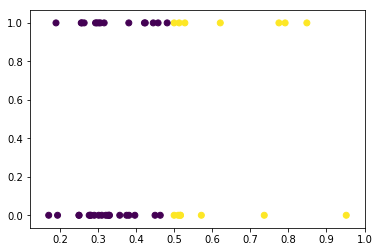

In [49]:
plt.scatter(y_pred_proba, y_test, c=y_pred)

# sns.scatterplot(y_pred_proba, y_test, hue=)

In [50]:
logit3.coef_

array([[ 0.10295872, -0.19684497, -0.22717192, -0.6042164 , -0.48745261,
        -0.76853872,  0.03540357, -0.12113024]])

In [51]:
X_test.columns

Index(['total_bill', 'size', 'sex_Female', 'day_Fri', 'day_Sat', 'day_Sun',
       'time_Dinner', 'smoker_No'],
      dtype='object')

In [53]:
pd.Series(dict(zip(X_test.columns, logit3.coef_[0]))).sort_values()

day_Sun       -0.768539
day_Fri       -0.604216
day_Sat       -0.487453
sex_Female    -0.227172
size          -0.196845
smoker_No     -0.121130
time_Dinner    0.035404
total_bill     0.102959
dtype: float64